In [13]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../assets/social_network_ads.csv")
df.shape

(400, 5)

In [3]:
df = df.drop(columns=["uid"])
df["gender"] = (df["gender"]=="Male").astype(int)

In [12]:
df.head()

,gender,age,estimated_salary,purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<Axes: xlabel='age', ylabel='estimated_salary'>

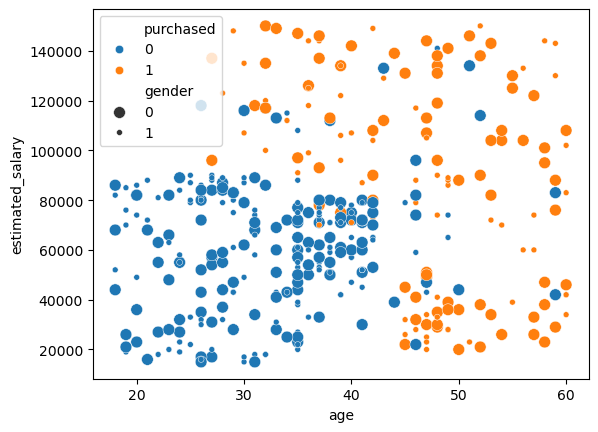

In [16]:
sns.scatterplot(df, x ="age",y =  "estimated_salary", hue= "purchased", size = "gender")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [8]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
lr = LogisticRegression()

model = lr.fit(X = x_train_scaled, y= y_train)

y_pred = model.predict(X=x_test_scaled)

acc_score = accuracy_score(y_true=y_test, y_pred = y_pred)

print(f"accuracy score {acc_score*100}")
print()
print(classification_report(y_true = y_test, y_pred= y_pred))

accuracy score 75.0

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.71      0.62      0.67        16

    accuracy                           0.75        40
   macro avg       0.74      0.73      0.73        40
weighted avg       0.75      0.75      0.75        40



In [10]:
import joblib

joblib.dump(model, filename="model.pkl")
joblib.dump(scaler, filename="scaler.pkl")

['scaler.pkl']